In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import geopandas
import matplotlib
import numpy as np
from shapely.geometry import Point, LineString

In [4]:
pip install --upgrade fiona

[(25.0, 45.0), (35.0, 43.0)]

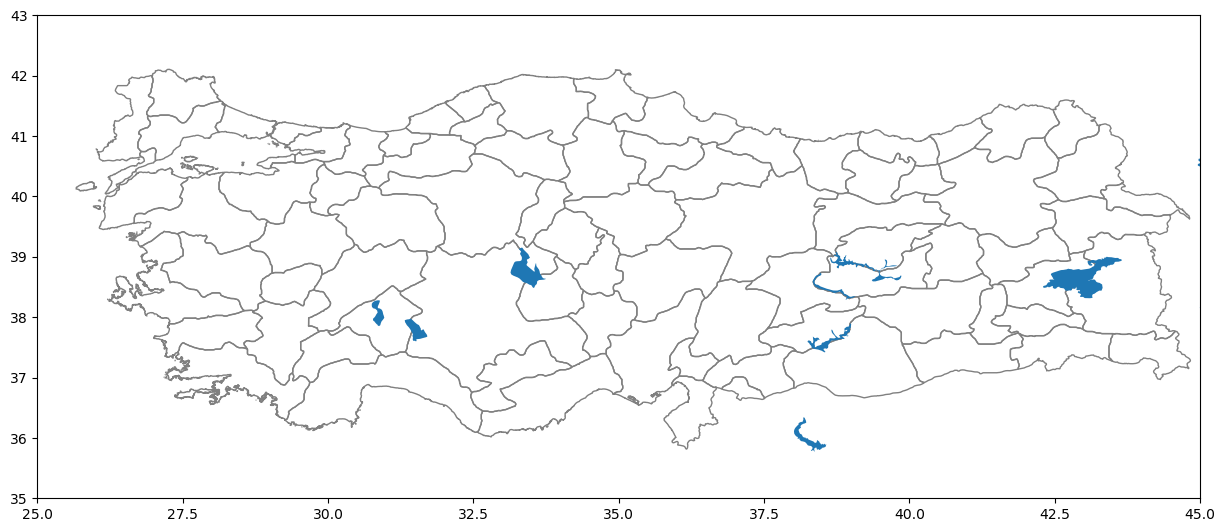

In [2]:
iller = geopandas.read_file("C:/Users/tosunoglu/Documents/GEOPANDAS/data/gadm41_TUR_1.json")
sular = geopandas.read_file("zip://./data/ne_10m_lakes.zip")

ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15,10))

sular.plot(ax=ax)
ax.set(xlim=(25,45), ylim=(35,43))

In [6]:
iller_mercator = iller.to_crs(epsg=3395)

<Axes: >

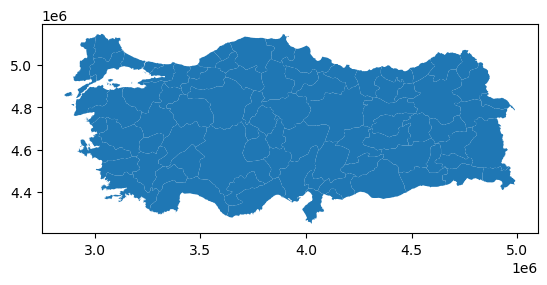

In [7]:
iller_mercator.plot()

[(25.0, 45.0), (35.0, 43.0)]

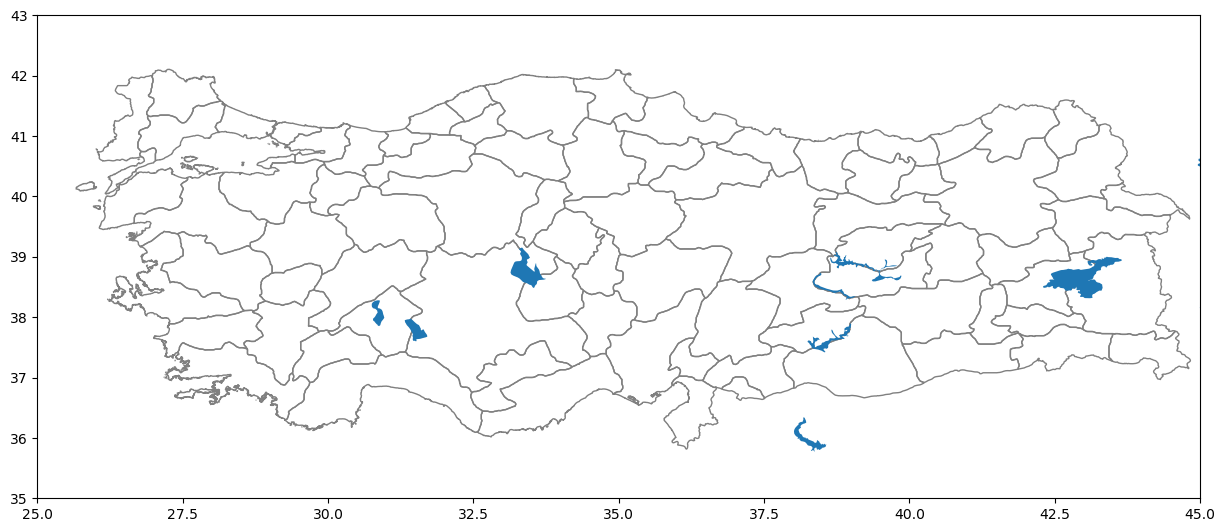

In [8]:
ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15,10))

sular.plot(ax=ax)
ax.set(xlim=(25,45), ylim=(35,43))

<Axes: >

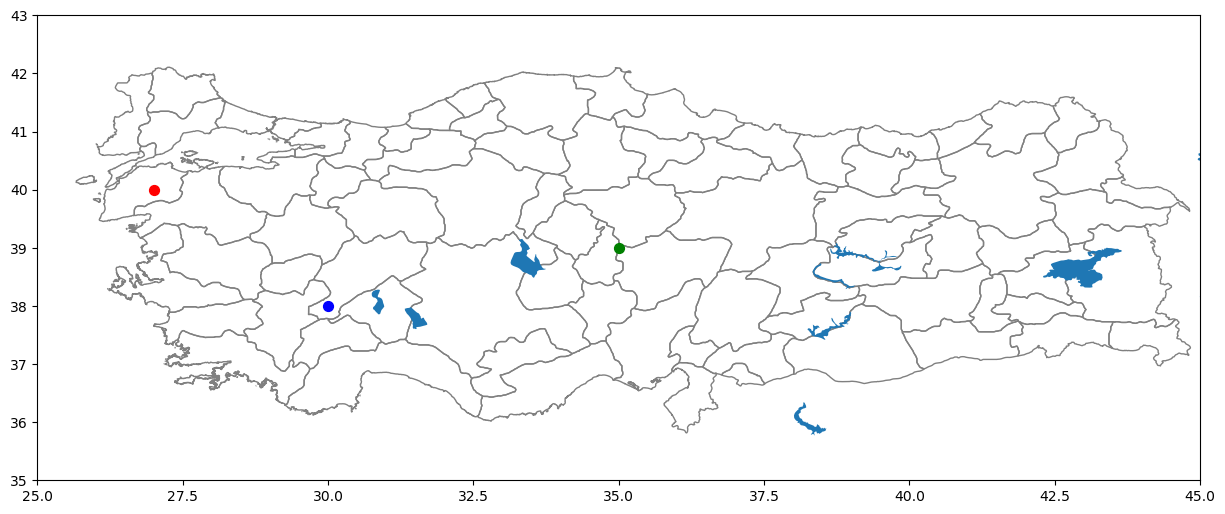

In [9]:
ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15,10))

sular.plot(ax=ax)
ax.set(xlim=(25,45), ylim=(35,43))

iha1 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([27], [40]))  # Örnek nokta 1
iha2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([30], [38]))  # Örnek nokta 2
iha3 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([35], [39]))  # Örnek nokta 3

# Noktaları çizdir
iha1.plot(ax=ax, color='red', marker='o', markersize=50)
iha2.plot(ax=ax, color='blue', marker='o', markersize=50)
iha3.plot(ax=ax, color='green', marker='o', markersize=50)

In [40]:
# Uygunluk fonksiyonu (önceki kodlardaki gibi)
def uygunluk_fonksiyon(noktalar):
    uzakliklar = []
    for i in range(len(noktalar)):
        for j in range(i+1, len(noktalar)):
            uzaklik = np.sqrt((noktalar[i][0] - noktalar[j][0])**2 + (noktalar[i][1] - noktalar[j][1])**2)
            uzakliklar.append(uzaklik)
    ortalama_uzaklik = np.mean(uzakliklar)
    standart_sapma = np.std(uzakliklar)
    uygunluk = ortalama_uzaklik - standart_sapma
    return uygunluk

# Homojen dağılım için noktaları bulan fonksiyon (güncellenmiş hali)
def homojen_dagitma_alg(dikdortgen, nokta_sayisi, iterasyon_sayisi=20000):
    
    if nokta_sayisi > 3:
        nokta_sayisi = nokta_sayisi - 1
    
    #if dikdortgen[1] - dikdortgen[0] > 1:
    dikdortgen = (dikdortgen[0] + 0.1, dikdortgen[1] - 0.1, dikdortgen[2], dikdortgen[3])

    #if dikdortgen[3] - dikdortgen[2] > 1:
    dikdortgen = (dikdortgen[0], dikdortgen[1], dikdortgen[2]+ 0.1, dikdortgen[3]-0.1)


    en_iyi_noktalar = None
    en_iyi_uygunluk = float('-inf')
    
    for _ in range(iterasyon_sayisi):
        noktalar = []
        for _ in range(nokta_sayisi):  # nokta_sayisi kadar nokta seçiyoruz
            x = np.random.uniform(dikdortgen[0], dikdortgen[1])
            y = np.random.uniform(dikdortgen[2], dikdortgen[3])
            noktalar.append((x, y))
        
        uygunluk = uygunluk_fonksiyon(noktalar)
        
        if en_iyi_noktalar is None or uygunluk > en_iyi_uygunluk:
            en_iyi_uygunluk = uygunluk
            en_iyi_noktalar = noktalar
    
     # En iyi noktaların ortalamasını alarak yeni bir nokta ekleyelim
    en_iyi_noktalar_np = np.array(en_iyi_noktalar)
    yeni_nokta = tuple(np.mean(en_iyi_noktalar_np, axis=0))
    en_iyi_noktalar.append(yeni_nokta)
    
    return en_iyi_noktalar

# Dikdörtgen alan sınırları (örnek olarak)
dikdortgen_alan = (38, 41, 38, 40)

# Homojen dağılım için nokta sayısı
nokta_sayisi = 10  # Örnek olarak 3 nokta seçiyoruz, istediğiniz sayıyı belirleyebilirsiniz

# Homojen dağılım için noktaları hesapla
homojen_noktalar = homojen_dagitma_alg(dikdortgen_alan, nokta_sayisi)

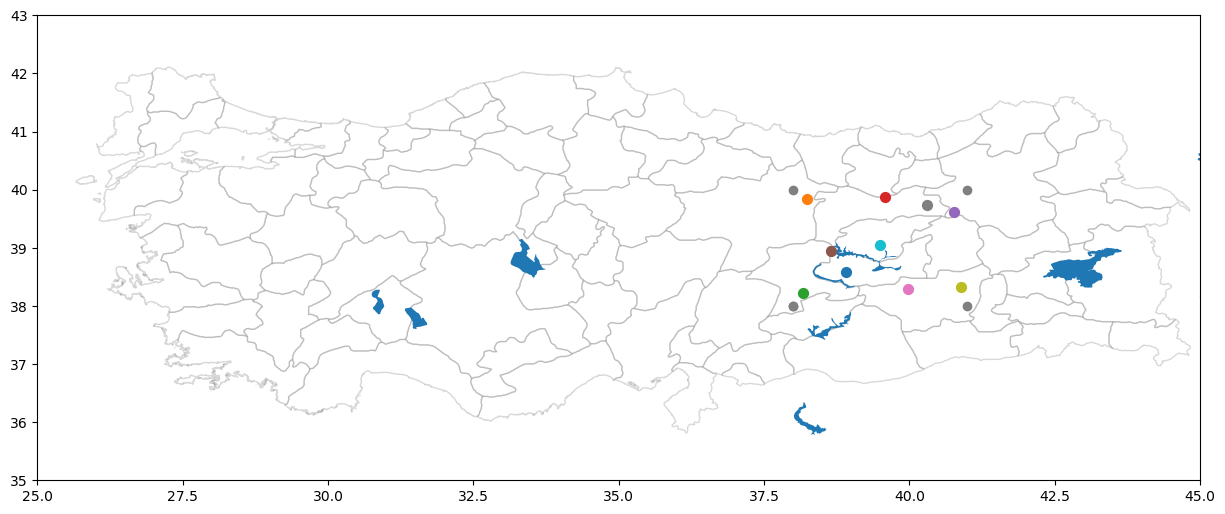

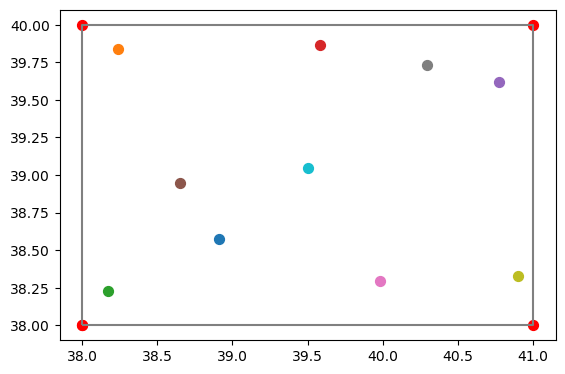

In [41]:
ax = iller.plot(edgecolor='gray', facecolor='none', figsize=(15, 10), alpha=0.3)
sular.plot(ax=ax)
ax.set(xlim=(25, 45), ylim=(35, 43))

# Homojen olarak dağılmış noktaları çizdir
for i, nokta in enumerate(homojen_noktalar):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color=f'C{i}', marker='o', markersize=50)

# Dikdörtgenin köşe noktalarını alalım
x0, x1, y0, y1 = dikdortgen_alan

# Dikdörtgenin köşe noktaları
noktalar = [(x0, y0), (x1, y0), (x1, y1), (x0, y1), (x0, y0)]

# Köşe noktalarını grafiğe ekleyelim
df = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar])})
df.plot(color='gray', ax=ax)

# Çizgiyi oluşturalım
cizgi = LineString(noktalar)

# Köşe noktalarını grafiğe ekleyelim
df_noktalar = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([Point(x, y) for x, y in noktalar])})

# Çizgiyi grafiğe ekleyelim
df_cizgi = geopandas.GeoDataFrame({'geometry': geopandas.GeoSeries([cizgi])})

# Grafiği çizdirelim
ax = df_noktalar.plot(color='red', marker='o', markersize=50)
df_cizgi.plot(color='gray', ax=ax)


# Homojen olarak dağılmış noktaları çizdir
for i, nokta in enumerate(homojen_noktalar):
    iha = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy([nokta[0]], [nokta[1]]))
    iha.plot(ax=ax, color=f'C{i}', marker='o', markersize=50)

# Grafik göster
import matplotlib.pyplot as plt
plt.show()
